Loading FastShip dataset...
Dataset loaded successfully, shape: (500, 30)

Starting AI Value Loop simulation...

Starting AI Value Loop Simulation
Preparing feature engineering...
Training profit prediction model...

Cycle 1/6
  ROI: 0.384
  Total profit: $1899.48
  Average profit per order: $15.20
  Model MAE: 27.52
  Model R²: -0.054
  Retraining trigger: No

Cycle 2/6
  ROI: 0.384
  Total profit: $1899.48
  Average profit per order: $15.20
  Model MAE: 27.18
  Model R²: -0.032
  Retraining trigger: No

Cycle 3/6
  ROI: 0.384
  Total profit: $1899.48
  Average profit per order: $15.20
  Model MAE: 27.52
  Model R²: -0.054
  Retraining trigger: Yes
  Trigger reason: Fixed cycle trigger (every 3 cycles)
  Executing retraining...
Training profit prediction model...
  Retraining complete

Cycle 4/6
  ROI: 0.384
  Total profit: $1899.48
  Average profit per order: $15.20
  Model MAE: 23.50
  Model R²: 0.217
  Retraining trigger: No

Cycle 5/6
  ROI: 0.384
  Total profit: $1899.48
  Averag

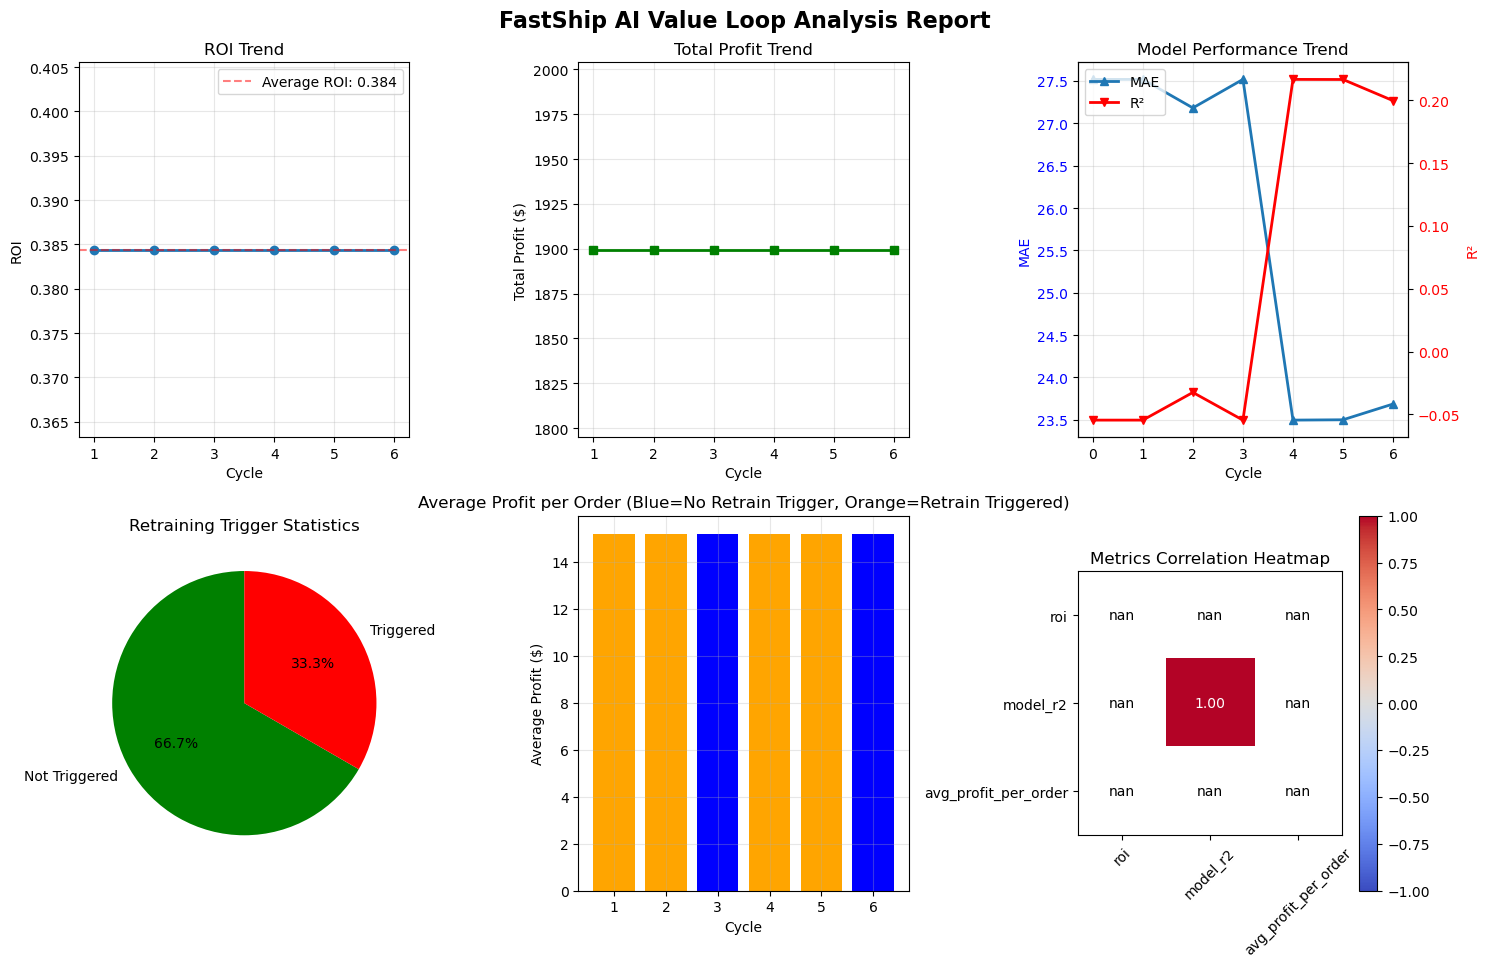

Visual report saved as 'fastship_value_loop_report.png'

AI Value Loop Analysis Recommendations

1. Retraining Mechanism Optimization Suggestions:
   Current retraining trigger rate: 33.3%
   → Retraining frequency is moderate, current thresholds can be maintained

2. ROI Optimization Suggestions:
   Average ROI: 0.384
   ROI volatility: 0.000
   → ROI performance is stable, consider expanding business scale

3. Model Performance Suggestions:
   Final model R²: 0.200
   Final model MAE: $23.69
   → Model explanatory power insufficient, suggest adding features or improving model structure

4. Feedback Loop Optimization:
   → Suggest shortening feedback collection cycles, updating models promptly
   → Establish automated A/B testing framework
   → Introduce more business metrics, such as customer satisfaction, return rate, etc.

Detailed AI Value Loop Log
   cycle     roi  total_profit  model_r2  should_retrain                                    trigger_reason
0      1  0.3844    1899.47

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class FastShipValueLoop:
    """
    Applies the AI Value Loop to the FastShip scenario, designing retraining trigger mechanisms and ROI feedback calculation methods.
    
    Input parameters:
    - data: FastShip dataset DataFrame
    
    Output:
    - AI Value Loop simulation results
    - Retraining trigger analysis
    - ROI calculation and feedback mechanism
    - Visual report
    
    Main functions:
    1. Implements a complete AI Value Loop cycle
    2. Designs intelligent retraining trigger mechanisms
    3. Calculates ROI and establishes feedback mechanisms
    4. Simulates multi-cycle value optimization
    """
    
    def __init__(self, data):
        self.data = data
        self.model = None
        self.value_loop_log = []
        self.performance_history = []
        
    def calculate_roi(self, data_subset):
        """
        Calculates ROI (Return on Investment).
        
        Input:
        - data_subset: DataFrame containing cost and revenue data
        
        Output:
        - roi: Return on Investment
        - profit: Total profit
        - total_cost: Total cost
        """
        # Calculate total cost (actual cost + penalty cost)
        total_cost = data_subset['actual_cost_usd'].sum() + data_subset['penalty_cost_usd'].sum()
        
        # Calculate total revenue
        total_revenue = data_subset['order_revenue_usd'].sum()
        
        # Calculate total profit
        total_profit = data_subset['actual_profit'].sum()
        
        # Calculate ROI
        if total_cost > 0:
            roi = total_profit / total_cost
        else:
            roi = 0
        
        return {
            'roi': roi,
            'total_profit': total_profit,
            'total_revenue': total_revenue,
            'total_cost': total_cost,
            'avg_profit_per_order': total_profit / len(data_subset)
        }
    
    def prepare_features(self):
        """Prepares feature engineering."""
        print("Preparing feature engineering...")
        
        # Copy data to avoid modifying the original
        df = self.data.copy()
        
        # Create features
        features = pd.DataFrame()
        
        # Basic features
        features['distance_km'] = df['distance_km']
        features['package_weight_kg'] = df['package_weight_kg']
        features['traffic_index'] = df['traffic_index']
        
        # Encode categorical features
        priority_mapping = {'standard': 0, 'express': 1, 'urgent': 2}
        features['priority_encoded'] = df['priority_level'].map(priority_mapping)
        
        # Time features
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            features['hour_of_day'] = df['timestamp'].dt.hour
            features['day_of_week'] = df['timestamp'].dt.dayofweek
        
        # Target variable: actual profit
        target = df['actual_profit']
        
        # Add prediction error as a feature (simulating feedback)
        features['prediction_error'] = abs(df['predicted_delivery_time_hours'] - 
                                          df['actual_delivery_time_hours'])
        
        return features, target
    
    def train_model(self, X_train, y_train):
        """Trains a prediction model."""
        print("Training profit prediction model...")
        
        model = RandomForestRegressor(
            n_estimators=50,  # Use fewer trees for faster training
            max_depth=5,
            random_state=42
        )
        
        model.fit(X_train, y_train)
        self.model = model
        
        return model
    
    def evaluate_model(self, model, X_test, y_test, cycle_num):
        """Evaluates model performance."""
        y_pred = model.predict(X_test)
        
        metrics = {
            'cycle': cycle_num,
            'mae': mean_absolute_error(y_test, y_pred),
            'mse': mean_squared_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred),
            'avg_predicted_profit': y_pred.mean(),
            'avg_actual_profit': y_test.mean(),
            'prediction_std': y_pred.std()
        }
        
        return metrics
    
    def check_retrain_trigger(self, current_metrics, historical_metrics, threshold_config):
        """
        Checks whether to trigger retraining.
        
        Input:
        - current_metrics: Current cycle performance metrics
        - historical_metrics: Historical performance metrics list
        - threshold_config: Trigger threshold configuration
        
        Output:
        - should_retrain: Whether to trigger retraining
        - trigger_reason: Trigger reason
        """
        
        if not historical_metrics:
            return False, "First training, no historical data for comparison"
        
        # Get the most recent historical metrics
        last_metrics = historical_metrics[-1]
        
        trigger_reasons = []
        
        # 1. Check if R² decline exceeds threshold
        r2_decline = last_metrics['r2'] - current_metrics['r2']
        if r2_decline > threshold_config['r2_decline_threshold']:
            trigger_reasons.append(f"R² decline {r2_decline:.3f} (exceeds threshold {threshold_config['r2_decline_threshold']})")
        
        # 2. Check if MAE increase exceeds threshold
        mae_increase = current_metrics['mae'] - last_metrics['mae']
        if mae_increase > threshold_config['mae_increase_threshold']:
            trigger_reasons.append(f"MAE increase {mae_increase:.2f} (exceeds threshold {threshold_config['mae_increase_threshold']})")
        
        # 3. Check deviation between predicted and actual profit
        profit_deviation = abs(current_metrics['avg_predicted_profit'] - 
                              current_metrics['avg_actual_profit']) / abs(current_metrics['avg_actual_profit'])
        if profit_deviation > threshold_config['profit_deviation_threshold']:
            trigger_reasons.append(f"Profit prediction deviation {profit_deviation:.2%} (exceeds threshold {threshold_config['profit_deviation_threshold']:.2%})")
        
        # 4. Fixed cycle trigger (every N cycles)
        if current_metrics['cycle'] % threshold_config['fixed_cycle_retrain'] == 0:
            trigger_reasons.append(f"Fixed cycle trigger (every {threshold_config['fixed_cycle_retrain']} cycles)")
        
        if trigger_reasons:
            return True, " | ".join(trigger_reasons)
        else:
            return False, "Performance metrics normal, no retraining needed"
    
    def simulate_value_loop(self, n_cycles=5, test_size=0.2):
        """
        Simulates the AI Value Loop.
        
        Input:
        - n_cycles: Number of simulation cycles
        - test_size: Test set proportion
        
        Output:
        - Complete Value Loop history
        - Performance metrics trends
        """
        
        print("\n" + "="*60)
        print("Starting AI Value Loop Simulation")
        print("="*60)
        
        # Prepare features
        X, y = self.prepare_features()
        
        # Initial data split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
        
        # Train initial model
        model = self.train_model(X_train, y_train)
        initial_metrics = self.evaluate_model(model, X_test, y_test, cycle_num=0)
        self.performance_history.append(initial_metrics)
        
        # Threshold configuration
        threshold_config = {
            'r2_decline_threshold': 0.05,
            'mae_increase_threshold': 2.0,
            'profit_deviation_threshold': 0.15,
            'fixed_cycle_retrain': 3
        }
        
        # Simulate multiple cycles
        for cycle in range(1, n_cycles + 1):
            print(f"\n{'='*30}")
            print(f"Cycle {cycle}/{n_cycles}")
            print(f"{'='*30}")
            
            # Simulate new data (in a real scenario, this would be newly collected data)
            # Here we simulate new data by adding noise
            X_new = X_test.copy()
            y_new = y_test.copy()
            
            # Add some variation to simulate real-world changes
            if cycle % 2 == 0:
                # Simulate distance increase (e.g., expansion to new regions)
                X_new['distance_km'] = X_new['distance_km'] * np.random.uniform(1.0, 1.2)
            
            # Calculate ROI for the current cycle
            # In a real scenario, actual decision data would be used here
            current_data = self.data.iloc[y_test.index].copy() if len(y_test.index) <= len(self.data) else self.data.sample(n=100)
            roi_results = self.calculate_roi(current_data)
            
            # Check if retraining should be triggered
            current_metrics = self.evaluate_model(model, X_new, y_new, cycle_num=cycle)
            
            should_retrain, trigger_reason = self.check_retrain_trigger(
                current_metrics, self.performance_history, threshold_config
            )
            
            # Log the current cycle
            cycle_log = {
                'cycle': cycle,
                'roi': roi_results['roi'],
                'total_profit': roi_results['total_profit'],
                'avg_profit_per_order': roi_results['avg_profit_per_order'],
                'model_mae': current_metrics['mae'],
                'model_r2': current_metrics['r2'],
                'should_retrain': should_retrain,
                'trigger_reason': trigger_reason,
                'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            }
            
            self.value_loop_log.append(cycle_log)
            
            print(f"  ROI: {roi_results['roi']:.3f}")
            print(f"  Total profit: ${roi_results['total_profit']:.2f}")
            print(f"  Average profit per order: ${roi_results['avg_profit_per_order']:.2f}")
            print(f"  Model MAE: {current_metrics['mae']:.2f}")
            print(f"  Model R²: {current_metrics['r2']:.3f}")
            print(f"  Retraining trigger: {'Yes' if should_retrain else 'No'}")
            if should_retrain:
                print(f"  Trigger reason: {trigger_reason}")
            
            # If retraining is needed
            if should_retrain:
                print("  Executing retraining...")
                # In a real scenario, the latest data would be used for training here
                # Here we simulate using combined data
                X_combined = pd.concat([X_train, X_new])
                y_combined = pd.concat([y_train, y_new])
                
                model = self.train_model(X_combined, y_combined)
                print("  Retraining complete")
            
            # Update history
            self.performance_history.append(current_metrics)
        
        return self.value_loop_log
    
    def visualize_value_loop(self):
        """Visualizes Value Loop results."""
        print("\nGenerating AI Value Loop visual report...")
        
        if not self.value_loop_log:
            print("No Value Loop data to visualize")
            return
        
        # Convert to DataFrame for easier analysis
        log_df = pd.DataFrame(self.value_loop_log)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('FastShip AI Value Loop Analysis Report', fontsize=16, fontweight='bold')
        
        # 1. ROI trend
        ax1 = axes[0, 0]
        ax1.plot(log_df['cycle'], log_df['roi'], marker='o', linewidth=2)
        ax1.set_title('ROI Trend')
        ax1.set_xlabel('Cycle')
        ax1.set_ylabel('ROI')
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=log_df['roi'].mean(), color='r', linestyle='--', alpha=0.5, 
                    label=f'Average ROI: {log_df["roi"].mean():.3f}')
        ax1.legend()
        
        # 2. Profit trend
        ax2 = axes[0, 1]
        ax2.plot(log_df['cycle'], log_df['total_profit'], marker='s', linewidth=2, color='green')
        ax2.set_title('Total Profit Trend')
        ax2.set_xlabel('Cycle')
        ax2.set_ylabel('Total Profit ($)')
        ax2.grid(True, alpha=0.3)
        
        # 3. Model performance trend
        ax3 = axes[0, 2]
        cycles = [m['cycle'] for m in self.performance_history]
        maes = [m['mae'] for m in self.performance_history]
        r2s = [m['r2'] for m in self.performance_history]
        
        ax3.plot(cycles, maes, marker='^', label='MAE', linewidth=2)
        ax3.set_xlabel('Cycle')
        ax3.set_ylabel('MAE', color='blue')
        ax3.tick_params(axis='y', labelcolor='blue')
        ax3.grid(True, alpha=0.3)
        
        ax3_r2 = ax3.twinx()
        ax3_r2.plot(cycles, r2s, marker='v', color='red', label='R²', linewidth=2)
        ax3_r2.set_ylabel('R²', color='red')
        ax3_r2.tick_params(axis='y', labelcolor='red')
        
        lines1, labels1 = ax3.get_legend_handles_labels()
        lines2, labels2 = ax3_r2.get_legend_handles_labels()
        ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        ax3.set_title('Model Performance Trend')
        
        # 4. Retraining trigger analysis
        ax4 = axes[1, 0]
        retrain_counts = log_df['should_retrain'].value_counts()
        colors = ['green', 'red']
        ax4.pie(retrain_counts, labels=['Not Triggered', 'Triggered'], autopct='%1.1f%%', 
                colors=colors, startangle=90)
        ax4.set_title('Retraining Trigger Statistics')
        
        # 5. Average profit per order distribution
        ax5 = axes[1, 1]
        ax5.bar(log_df['cycle'], log_df['avg_profit_per_order'], 
                color=['blue' if x else 'orange' for x in log_df['should_retrain']])
        ax5.set_title('Average Profit per Order (Blue=No Retrain Trigger, Orange=Retrain Triggered)')
        ax5.set_xlabel('Cycle')
        ax5.set_ylabel('Average Profit ($)')
        ax5.grid(True, alpha=0.3)
        
        # 6. Performance metrics correlation
        ax6 = axes[1, 2]
        if len(log_df) > 1:
            correlation = log_df[['roi', 'model_r2', 'avg_profit_per_order']].corr()
            im = ax6.imshow(correlation, cmap='coolwarm', vmin=-1, vmax=1)
            ax6.set_xticks(range(len(correlation.columns)))
            ax6.set_yticks(range(len(correlation.columns)))
            ax6.set_xticklabels(correlation.columns, rotation=45)
            ax6.set_yticklabels(correlation.columns)
            ax6.set_title('Metrics Correlation Heatmap')
            
            # Add value labels
            for i in range(len(correlation.columns)):
                for j in range(len(correlation.columns)):
                    ax6.text(j, i, f'{correlation.iloc[i, j]:.2f}', 
                            ha='center', va='center', color='white' if abs(correlation.iloc[i, j]) > 0.5 else 'black')
            
            plt.colorbar(im, ax=ax6)
        else:
            ax6.text(0.5, 0.5, 'More data needed\nfor correlation analysis', 
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Metrics Correlation')
        
        plt.tight_layout()
        plt.savefig('fastship_value_loop_report.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Visual report saved as 'fastship_value_loop_report.png'")
    
    def generate_recommendations(self):
        """Generates recommendations based on analysis."""
        print("\n" + "="*50)
        print("AI Value Loop Analysis Recommendations")
        print("="*50)
        
        if not self.value_loop_log:
            print("Insufficient data to generate recommendations")
            return
        
        log_df = pd.DataFrame(self.value_loop_log)
        
        print("\n1. Retraining Mechanism Optimization Suggestions:")
        retrain_rate = log_df['should_retrain'].mean()
        print(f"   Current retraining trigger rate: {retrain_rate:.1%}")
        
        if retrain_rate < 0.3:
            print("   → Suggest lowering trigger thresholds, increasing retraining frequency")
        elif retrain_rate > 0.7:
            print("   → Suggest raising trigger thresholds, reducing unnecessary retraining")
        else:
            print("   → Retraining frequency is moderate, current thresholds can be maintained")
        
        print("\n2. ROI Optimization Suggestions:")
        avg_roi = log_df['roi'].mean()
        roi_std = log_df['roi'].std()
        
        print(f"   Average ROI: {avg_roi:.3f}")
        print(f"   ROI volatility: {roi_std:.3f}")
        
        if roi_std > avg_roi * 0.5:
            print("   → ROI volatility is high, suggest strengthening stability control")
        else:
            print("   → ROI performance is stable, consider expanding business scale")
        
        print("\n3. Model Performance Suggestions:")
        final_r2 = self.performance_history[-1]['r2']
        final_mae = self.performance_history[-1]['mae']
        
        print(f"   Final model R²: {final_r2:.3f}")
        print(f"   Final model MAE: ${final_mae:.2f}")
        
        if final_r2 < 0.5:
            print("   → Model explanatory power insufficient, suggest adding features or improving model structure")
        else:
            print("   → Model performance good, continue with current architecture")
        
        print("\n4. Feedback Loop Optimization:")
        print("   → Suggest shortening feedback collection cycles, updating models promptly")
        print("   → Establish automated A/B testing framework")
        print("   → Introduce more business metrics, such as customer satisfaction, return rate, etc.")
        
        return {
            'retrain_rate': retrain_rate,
            'avg_roi': avg_roi,
            'roi_std': roi_std,
            'final_r2': final_r2,
            'final_mae': final_mae
        }

# Main execution program
if __name__ == "__main__":
    # Load data
    print("Loading FastShip dataset...")
    try:
        df = pd.read_csv('fastship_data.csv')
        print(f"Dataset loaded successfully, shape: {df.shape}")
    except FileNotFoundError:
        print("Dataset not found. Please run the first code block to generate data first.")
        df = None
    
    if df is not None:
        # Create FastShip Value Loop instance
        value_loop = FastShipValueLoop(df)
        
        # Simulate AI Value Loop
        print("\nStarting AI Value Loop simulation...")
        loop_log = value_loop.simulate_value_loop(n_cycles=6, test_size=0.25)
        
        # Visualize results
        value_loop.visualize_value_loop()
        
        # Generate recommendations
        recommendations = value_loop.generate_recommendations()
        
        # Display detailed Value Loop log
        print("\n" + "="*50)
        print("Detailed AI Value Loop Log")
        print("="*50)
        
        log_df = pd.DataFrame(loop_log)
        print(log_df[['cycle', 'roi', 'total_profit', 'model_r2', 'should_retrain', 'trigger_reason']].to_string())